<a href="https://colab.research.google.com/github/FrZeller/Portfolio/blob/main/Exercicio(crosstab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

#importanto o relatoria de vendas e ajustando as colunas
vendas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/refs/heads/master/dados/relatorio_vendas.csv')
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format='%Y-%m-%d')

#criando um DF
df_estado = vendas.copy()
df_estado = df_estado.query('estado == "Bahia"')[["data_pedido","vendas"]]

#Agrupar as vendas por semmestre(2Q)
df_estado.set_index('data_pedido', inplace=True)
df_estado = df_estado.resample('2Q', closed='left').sum()
df_estado.reset_index(inplace=True)
df_estado.head()




<ipython-input-34-f31e2cbf0903>:16: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



,data_pedido,vendas
0,2016-06-30,48100.19
1,2016-12-31,84362.51
2,2017-06-30,25747.57
3,2017-12-31,43287.77
4,2018-06-30,47121.96


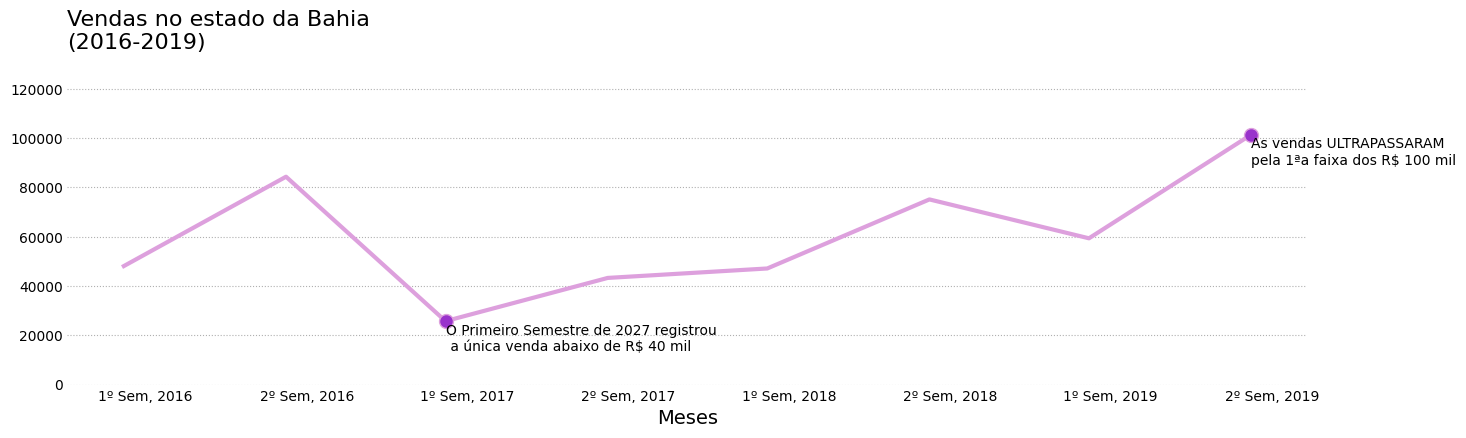

In [35]:
#area do grafico
fig, ax = plt.subplots(figsize=(16,4))

#organizando o grafico e seus parametros
vendas_min = df_estado['vendas'].min()
vendas_max = df_estado['vendas'].max()
valores = df_estado.vendas.values

#gerando a lista com os pontos a marcar
pontos_a_marcar = list((valores == vendas_min) | (valores == vendas_max))

#criando o grafico
ax.plot(df_estado["data_pedido"], df_estado['vendas'], lw=3, color = "plum", marker = "o",
        markersize=10, markerfacecolor="darkorchid", markevery = pontos_a_marcar)

#personalizando
ax.set_title("Vendas no estado da Bahia\n(2016-2019)", fontsize=16, loc="left", pad=20)
ax.set_xlabel("Meses", fontsize=14)
ax.set_ylabel("")
ax.grid(axis = "y", linestyle = ":")
ax.set_frame_on(False)
ax.tick_params(axis="both", which="both", length=0)
plt.ylim(0,1.25e5)

#Definindo intervalo semestral
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth = [6,12]))
labels = ["1º Sem, 2016", "2º Sem, 2016", "1º Sem, 2017", "2º Sem, 2017",
          "1º Sem, 2018", "2º Sem, 2018", "1º Sem, 2019", "2º Sem, 2019"]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(labels, ha = "left")

#facilitar o entendimento do grafico

for x, y in zip(df_estado.data_pedido, df_estado.vendas):
  if y == vendas_min:
    ax.text(x, y=y - 1.2e4, s=f"O Primeiro Semestre de 2027 registrou\n a única venda abaixo de R$ 40 mil")
  if y == vendas_max:
    ax.text(x, y=y - 1.2e4, s = f"As vendas ULTRAPASSARAM \npela 1ªa faixa dos R$ 100 mil")

plt.show()

In [41]:
# Importando o relatório de vendas
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")

#criando um df
df_ne = vendas.copy()
df_ne = df_ne.query("regiao == 'Nordeste'")[["estado","data_pedido","lucro"]]

#criando um crosstab com os lucros por dia por estado
df_estado_ne = pd.crosstab(index = df_ne.data_pedido, columns = df_ne.estado, values = df_ne.lucro, aggfunc="sum")

#agrupadno os lucros (ano)
df_estado_ne = df_estado_ne.resample("YE").sum()
df_estado_ne = round(df_estado_ne/1e3,2)


In [51]:
fig = px.line(df_estado_ne, x=df_estado_ne.index, y=df_estado_ne.columns, markers = True, labels={"estado": "Estado"},
              color_discrete_sequence = [
    "#1f77b4", "#d62728", "#ffbf00", "#2ca02c","#7f7f7f", "#1f4e79", "#ff7f0e","#c0c0c0","#9467bd",])

#ajustando o layout
fig.update_layout(width=1300, height=600, font_size=15,
                  title_text="Lucro das lojas de departamento por ano na Região NORDESTE" + "<br><sup size=1 style='color:#555655'> De 2016 a 2019",
                  xaxis_title='', yaxis_title='')
fig.update_yaxes(tickprefix="R$", ticksuffix=" mil")

#ajustando o eixo X
labels = ['2016', '2017', '2018', '2019']
fig.update_xaxes(ticktext = labels, tickvals=df_estado_ne.index)

#dados ao passar o mouse
fig.update_traces(mode="markers+lines", hovertemplate = "<b>Período<b> %{x} <br> <b>Lucro:<b> %{y}")



fig.show()